In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/mushroom.csv

--2024-03-21 06:22:56--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/mushroom.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379652 (371K) [text/plain]
Saving to: ‘mushroom.csv.1’

mushroom.csv.1      100%[===================>] 370.75K  --.-KB/s    in 0.05s   

2024-03-21 06:22:57 (7.88 MB/s) - ‘mushroom.csv.1’ saved [379652/379652]



importing libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

load data

In [ ]:
data_set=pd.read_csv('/content/mushroom.csv')
data_set.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [ ]:
data_set.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [ ]:
data_set[data_set.isnull().any(axis=1)]

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
3984,x,y,b,t,n,f,c,b,e,e,NaN,s,s,e,w,p,w,t,e,w,c,w,e
4023,x,y,e,f,y,f,c,n,b,t,NaN,k,s,w,w,p,w,o,e,w,v,p,p
4076,f,y,u,f,n,f,c,n,h,e,NaN,s,f,w,w,p,w,o,f,h,y,d,e
4100,x,y,e,f,y,f,c,n,b,t,NaN,k,s,p,p,p,w,o,e,w,v,d,p
4104,x,y,n,f,f,f,c,n,b,t,NaN,s,s,p,p,p,w,o,e,w,v,l,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,NaN,s,s,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,NaN,s,s,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,NaN,s,k,w,w,p,w,o,e,w,v,l,p


define data

In [ ]:
y=data_set['class']
x=data_set.drop(['class'],axis=1)

data processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
Y=LabelEncoder().fit_transform(y)#replace purchased (dependent variable) with 0 and 1

In [ ]:
x=pd.get_dummies(x)# to convert categorical variables into dummy/indicator variables

splitting the train test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

model building

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

predicting test data

In [ ]:
y_pred= classifier.predict(x_test)

model evaluation

In [ ]:
from sklearn.metrics import roc_curve, auc#computes the Area Under the ROC(reciever operating control curve) Curve (AUC)
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1272    0]
 [   0 1166]]


In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1272
           p       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
accuracy_score(y_test,y_pred)

1.0

plot the decision tree

[Text(0.5, 0.9285714285714286, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(0.23076923076923078, 0.7857142857142857, 'x[21] <= 0.5\nentropy = 0.654\nsamples = 3203\nvalue = [540, 2663]'),
 Text(0.15384615384615385, 0.6428571428571429, 'entropy = 0.0\nsamples = 2279\nvalue = [0, 2279]'),
 Text(0.3076923076923077, 0.6428571428571429, 'x[52] <= 0.5\nentropy = 0.979\nsamples = 924\nvalue = [540, 384]'),
 Text(0.23076923076923078, 0.5, 'x[62] <= 0.5\nentropy = 0.923\nsamples = 580\nvalue = [196, 384]'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[34] <= 0.5\nentropy = 0.587\nsamples = 447\nvalue = [63, 384]'),
 Text(0.07692307692307693, 0.21428571428571427, 'entropy = 0.0\nsamples = 384\nvalue = [0, 384]'),
 Text(0.23076923076923078, 0.21428571428571427, 'entropy = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 133\nvalue = [133, 0]'),
 Text(0.38461538461538464, 0.5, 'entropy = 0.0\nsampl

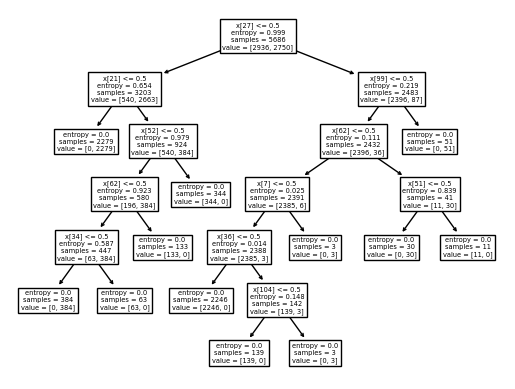

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier)

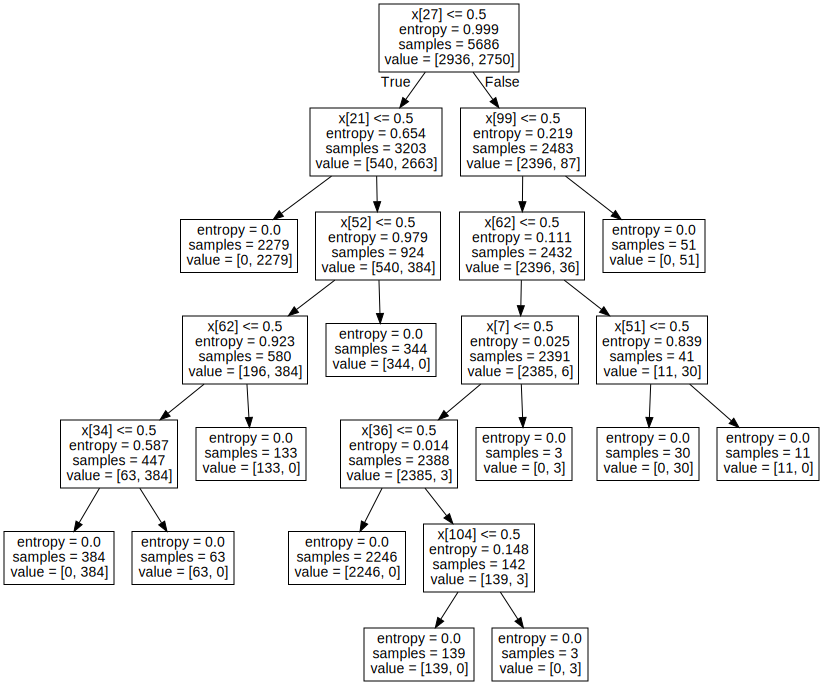

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(classifier)
graph = graphviz.Source(dot_data)
graph